# Introduction to Deep Learning in Python

### Course Contents:
1. Basics of deep learning and neural networks
2. Optimizing a neural network with backward propagation
3. Building deep learning models with keras
4. Fine-tuning keras models

# 1. Basics of deep learning and neural networks

### Chapter Contents:
1. Introduction to deep learning
2. Forward propagation
3. Activation functions
4. Deeper networks

## Introduction to deep learning

### Interactions

- Neural networks account for interactions really well
- Deep learning uses especially powerful neural networks
    - Text
    - Images
    - Videos
    - Audio
    - Source code
    
### Course structure
- First two chapters focus on conceptual knowledge
    - Debug and tune deep learning models on conventional prediction problems
    - Lay the foundation for progressing towards modern applications
- This will pay off in the third and fourth chapters

## Forward propagation

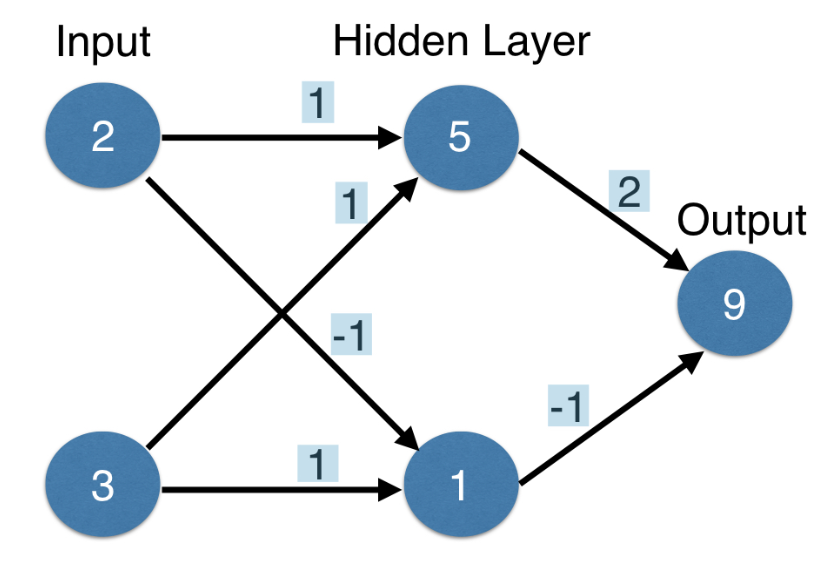

- Multiply - add process
- Dot product
- Forward propagation for one data point at a time
- Output is the prediction for that data point

### Forward propagation code

In [1]:
import numpy as np
input_data = np.array([2, 3])
weights = {'node_0': np.array([1, 1]),
           'node_1': np.array([2, -1]),
           'output': np.array([2, -1])}
node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

In [2]:
hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

[5 1]


In [3]:
output = (hidden_layer_values * weights['output']).sum()
print(output)

9


## Activation functions

- An activation function allows the model to capture non-linearities
- Applied to node inputs to produce node output

### ReLU (Rectified Linear Activation)

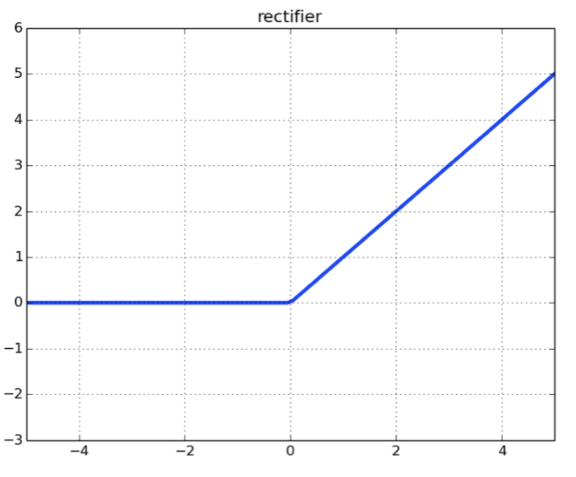

\begin{equation}
  RELU(x)=\begin{cases}
    0, & \text{if $x<0$}.\\
    x, & \text{x >= 0}.
  \end{cases}
\end{equation}

In [4]:
import numpy as np
input_data = np.array([-1, 2])
weights = {'node_0': np.array([3, 3]),
           'node_1': np.array([1, 5]),
           'output': np.array([2, -1])}
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)
hidden_layer_outputs = np.array([node_0_output, node_1_output])
output = (hidden_layer_outputs * weights['output']).sum()
print(output)

0.99010953783342


#### Exercise: The Rectified Linear Activation Function

In [5]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 'node_1': np.array([ 4, -5]), 'output': np.array([2, 7])}

In [6]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(input, 0)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


#### Exercise: Applying the network to many observations/rows of data

In [7]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]),
           'node_1': np.array([ 4, -5]),
           'output': np.array([2, 7])}

In [8]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


## Deeper networks

### Multiple hidden layers

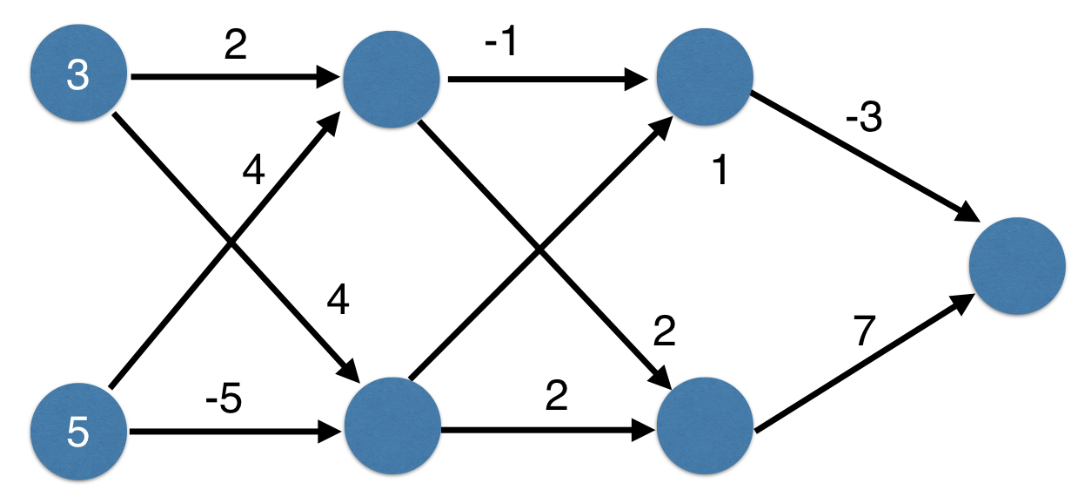

### Representation learning

- Deep networks internally build representations of patterns in the data
- Partially replace the need for feature engineering
- Subsequent layers build increasingly sophisticated representations of raw data

### Deep learning

- Modeler doesn't need to specify the interactions
- When you train the model, the neural network gets weights that find the relevant patterns to make better predictions

#### Exercise: Multi-layer neural networks

In [9]:
input_data = np.array([3, 5])
weights = {'node_0_0': np.array([2, 4]),
           'node_0_1': np.array([ 4, -5]),
           'node_1_0': np.array([-1,  2]),
           'node_1_1': np.array([1, 2]),
           'output': np.array([2, 7])}

In [10]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


# 2. Optimizing a neural network with backward propagation

### Chapter Contents:
1. The need for optimization
2. Gradient descent
3. Backpropogation
4. Backpropogation in practice

## The need for optimization

### Predictions with multiple points

- Making accurate predictions gets harder with more points
- At any set of weights, there are many values of the error corresponding to the many points we make predictions for

### Loss function

- Aggregates errors in predictions from many data points into single number
- Measure of model's predictive performance
- Lower loss function value means a better model
- Goal: Find the weights that give the lowest value for the loss function
- Gradient descent

### Gradient descent

- Imagine you are in a pitch dark field
- Want to find the lowest point
- Feel the ground to see how it slopes
- Take a small step downhill
- Repeat until it is uphill in every direction

### Gradient descent steps

- Start at random point
- Until you are somewhere flat:
    - Find the slope
    - Take a step downhill

#### Exercise: Coding how weight changes affect accuracy

In [11]:
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [12]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


#### Exercise: Scaling up to multiple data points

In [13]:
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
weights_0 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1, 2]),
             'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]),
             'node_1': np.array([1. , 1.5]),
             'output': np.array([1. , 1.5])}
target_actuals = [1, 3, 5, 7]

In [14]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

C:\Users\melihcanyardi\anaconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


## Gradient descent

- If the slope is positive:
    - Going opposite the slope means moving to lower numbers
    - Subtract the slope from the current value
    - Too big a step might lead us astray
- Solution: learning rate
    - Update each weight by subtracting learning rate * slope

### Code to calculate slopes and update weights

In [15]:
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4])
target = 6
learning_rate = 0.01
preds = (weights * input_data).sum()
error = preds - target
print(error)

5


In [16]:
gradient = 2 * input_data * error
gradient

array([30, 40])

In [17]:
weights_updated = weights - learning_rate * gradient
preds_updated = (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

2.5


## Backpropagation

- Just as forward propogation sends input data through the hidden layers and into the output layer, backpropagation takes the error from the output layer and propagates it backward through the hidden layers, towards the input layer
- Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
- Comes from chain rule of calculus
- Important to understand the process, but you will generally use a library that implements this

### Backpropagation process

- Trying to estimate the slope of the loss with respect to each weight
- Do forward propagation to calculate predictions and errors
- Go back one layer at a time
- Gradients for weight is product of:
    1. Node value feeding into that weight
    2. Slope of loss function with respect to node it feeds into
    3. Slope of activation function at the node it feeds into
- Need to also keep track of the slopes of the loss function with respect to node values
- Slope of node values are the sum of the slopes for all weights that come out of them

## Backpropogation in practice

### Calculating slopes associated with any weight

- Gradients for weight is product of:
    1. Node value feeding into that weight
    2. Slope of activation function for the node being fed into
    3. Slope of loss function with respect to output node

### Backrpopagation: Recap

- Start at some random set of weights
- Use forward propagation to make a prediction
- Use backward propagation to calculate the slope of the loss function with respect to each weight
- Multiply that slope by the learning rate, and subtract from the current weights
- Keep going with that cycle until we get to a flat part

### Stochastic gradient descent

- It is common to calculate slopes on only a subset of the data (_a batch_)
- Use a different batch of data to calculate the next update
- Start over from the beginning once all data is used
- Each time through the training data is called an epoch
- When slopes are calculated on one batch at a time: stochastic gradient descent

# 3. Building deep learning models with keras

### Chapter Contents:
1. Creating a keras model
2. Compiling and fitting a model
3. Classification models
4. Using models

## Creating a keras model

### Model building steps

- Specify Architecture
- Compile
- Fit
- Predict

### Model specification
```python
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

predictors = np.loadtxt('predictors_data.csv', delimiter=',')
n_cols = predictors.shape[1]

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
```

#### Exercise: Specifying a model

In [18]:
import pandas as pd

df = pd.read_csv("https://assets.datacamp.com/production/repositories/654/datasets/8a57adcdb5bfb3e603dad7d3c61682dfe63082b8/hourly_wages.csv")
predictors = np.array(df.drop("wage_per_hour", axis=1))
target = np.array(df["wage_per_hour"])

In [19]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add the first layer
model.add(Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1))

## Compiling and fitting a model

### Why you need to compile your model

- Specify the optimizer
    - Many options and mathematically complex
    - "Adam" is usually a good choice
- Loss function
    - "mean_squared_error" common for regression

### Compiling a model

```python
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
```

### What is fitting a model

- Applying backpropagation and gradient descent with your data to update the weights
- Scaling data before fitting can ease optimization

### Fitting a model

```python
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(predictors, target)
```

#### Exercise: Compiling the model

In [20]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


#### Exercise: Fit the model

In [21]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(predictors, target)

17/17 [==============================] - 0s 1ms/step - loss: 27.9991


## Classification models

### Classification

- `'categorical_crossentropy'` loss function
- Similar to log loss: Lower is better
- Add `metrics = ['accuracy']` to compile step for easy-to-understand diagnostics
- Output layer has separate node for each possible outcome, and uses `'softmax'` activation


```python
from keras.utils.np_utils import to_categorical

data = pd.read_csv('basketball_shot_log.csv')
predictors = data.drop(['shot_result'], axis=1).as_matrix()
target = to.categorical(data.shot_result)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = (n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentrpy', metrics=['accuracy'])
model.fit(predictors, target)
```

In [22]:
df = pd.read_csv("https://assets.datacamp.com/production/repositories/654/datasets/92b75b9bc0c0a8a30999d76f4a1ee786ef072a9c/titanic_all_numeric.csv")
predictors = np.array(df.drop(['survived'], axis=1).astype("float"))
n_cols = predictors.shape[1]

In [23]:
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target)

28/28 [==============================] - 0s 923us/step - loss: 4.5120 - accuracy: 0.5623


## Using models

- Save
- Reload
- Make predictions

### Saving, reloading and using your Model

```python
from keras.models import load_model
model.save('model_file.h5')
my_model = load_model('my_model.h5')
predictions = my_model.predict(data_to_predict_with)
probability_true = predictions[:,1]
```

### Verifying model structure
```python
my_model.summary()
```

#### Exercise: Making predictions

In [24]:
pred_data = np.array([[2, 34.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                      [2, 31.0, 1, 1, 26.25, 0, False, 0, 0, 1],
                      [1, 11.0, 1, 2, 120.0, 1, False, 0, 0, 1],
                      [3, 0.42, 0, 1, 8.5167, 1, False, 1, 0, 0],
                      [3, 27.0, 0, 0, 6.975, 1, False, 0, 0, 1],
                      [3, 31.0, 0, 0, 7.775, 1, False, 0, 0, 1],
                      [1, 39.0, 0, 0, 0.0, 1, False, 0, 0, 1],
                      [3, 18.0, 0, 0, 7.775, 0, False, 0, 0, 1],
                      [2, 39.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                      [1, 33.0, 1, 0, 53.1, 0, False, 0, 0, 1],
                      [3, 26.0, 0, 0, 7.8875, 1, False, 0, 0, 1],
                      [3, 39.0, 0, 0, 24.15, 1, False, 0, 0, 1],
                      [2, 35.0, 0, 0, 10.5, 1, False, 0, 0, 1],
                      [3, 6.0, 4, 2, 31.275, 0, False, 0, 0, 1],
                      [3, 30.5, 0, 0, 8.05, 1, False, 0, 0, 1],
                      [1, 29.69911764705882, 0, 0, 0.0, 1, True, 0, 0, 1],
                      [3, 23.0, 0, 0, 7.925, 0, False, 0, 0, 1],
                      [2, 31.0, 1, 1, 37.0042, 1, False, 1, 0, 0],
                      [3, 43.0, 0, 0, 6.45, 1, False, 0, 0, 1],
                      [3, 10.0, 3, 2, 27.9, 1, False, 0, 0, 1],
                      [1, 52.0, 1, 1, 93.5, 0, False, 0, 0, 1],
                      [3, 27.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
                      [1, 38.0, 0, 0, 0.0, 1, False, 0, 0, 1],
                      [3, 27.0, 0, 1, 12.475, 0, False, 0, 0, 1],
                      [3, 2.0, 4, 1, 39.6875, 1, False, 0, 0, 1],
                      [3, 29.69911764705882, 0, 0, 6.95, 1, True, 0, 1, 0],
                      [3, 29.69911764705882, 0, 0, 56.4958, 1, True, 0, 0, 1],
                      [2, 1.0, 0, 2, 37.0042, 1, False, 1, 0, 0],
                      [3, 29.69911764705882, 0, 0, 7.75, 1, True, 0, 1, 0],
                      [1, 62.0, 0, 0, 80.0, 0, False, 0, 0, 0],
                      [3, 15.0, 1, 0, 14.4542, 0, False, 1, 0, 0],
                      [2, 0.83, 1, 1, 18.75, 1, False, 0, 0, 1],
                      [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
                      [3, 23.0, 0, 0, 7.8542, 1, False, 0, 0, 1],
                      [3, 18.0, 0, 0, 8.3, 1, False, 0, 0, 1],
                      [1, 39.0, 1, 1, 83.1583, 0, False, 1, 0, 0],
                      [3, 21.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
                      [3, 29.69911764705882, 0, 0, 8.05, 1, True, 0, 0, 1],
                      [3, 32.0, 0, 0, 56.4958, 1, False, 0, 0, 1],
                      [1, 29.69911764705882, 0, 0, 29.7, 1, True, 1, 0, 0],
                      [3, 20.0, 0, 0, 7.925, 1, False, 0, 0, 1],
                      [2, 16.0, 0, 0, 10.5, 1, False, 0, 0, 1],
                      [1, 30.0, 0, 0, 31.0, 0, False, 1, 0, 0],
                      [3, 34.5, 0, 0, 6.4375, 1, False, 1, 0, 0],
                      [3, 17.0, 0, 0, 8.6625, 1, False, 0, 0, 1],
                      [3, 42.0, 0, 0, 7.55, 1, False, 0, 0, 1],
                      [3, 29.69911764705882, 8, 2, 69.55, 1, True, 0, 0, 1],
                      [3, 35.0, 0, 0, 7.8958, 1, False, 1, 0, 0],
                      [2, 28.0, 0, 1, 33.0, 1, False, 0, 0, 1],
                      [1, 29.69911764705882, 1, 0, 89.1042, 0, True, 1, 0, 0],
                      [3, 4.0, 4, 2, 31.275, 1, False, 0, 0, 1],
                      [3, 74.0, 0, 0, 7.775, 1, False, 0, 0, 1],
                      [3, 9.0, 1, 1, 15.2458, 0, False, 1, 0, 0],
                      [1, 16.0, 0, 1, 39.4, 0, False, 0, 0, 1],
                      [2, 44.0, 1, 0, 26.0, 0, False, 0, 0, 1],
                      [3, 18.0, 0, 1, 9.35, 0, False, 0, 0, 1],
                      [1, 45.0, 1, 1, 164.8667, 0, False, 0, 0, 1],
                      [1, 51.0, 0, 0, 26.55, 1, False, 0, 0, 1],
                      [3, 24.0, 0, 3, 19.2583, 0, False, 1, 0, 0],
                      [3, 29.69911764705882, 0, 0, 7.2292, 1, True, 1, 0, 0],
                      [3, 41.0, 2, 0, 14.1083, 1, False, 0, 0, 1],
                      [2, 21.0, 1, 0, 11.5, 1, False, 0, 0, 1],
                      [1, 48.0, 0, 0, 25.9292, 0, False, 0, 0, 1],
                      [3, 29.69911764705882, 8, 2, 69.55, 0, True, 0, 0, 1],
                      [2, 24.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                      [2, 42.0, 0, 0, 13.0, 0, False, 0, 0, 1],
                      [2, 27.0, 1, 0, 13.8583, 0, False, 1, 0, 0],
                      [1, 31.0, 0, 0, 50.4958, 1, False, 0, 0, 1],
                      [3, 29.69911764705882, 0, 0, 9.5, 1, True, 0, 0, 1],
                      [3, 4.0, 1, 1, 11.1333, 1, False, 0, 0, 1],
                      [3, 26.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
                      [1, 47.0, 1, 1, 52.5542, 0, False, 0, 0, 1],
                      [1, 33.0, 0, 0, 5.0, 1, False, 0, 0, 1],
                      [3, 47.0, 0, 0, 9.0, 1, False, 0, 0, 1],
                      [2, 28.0, 1, 0, 24.0, 0, False, 1, 0, 0],
                      [3, 15.0, 0, 0, 7.225, 0, False, 1, 0, 0],
                      [3, 20.0, 0, 0, 9.8458, 1, False, 0, 0, 1],
                      [3, 19.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
                      [3, 29.69911764705882, 0, 0, 7.8958, 1, True, 0, 0, 1],
                      [1, 56.0, 0, 1, 83.1583, 0, False, 1, 0, 0],
                      [2, 25.0, 0, 1, 26.0, 0, False, 0, 0, 1],
                      [3, 33.0, 0, 0, 7.8958, 1, False, 0, 0, 1],
                      [3, 22.0, 0, 0, 10.5167, 0, False, 0, 0, 1],
                      [2, 28.0, 0, 0, 10.5, 1, False, 0, 0, 1],
                      [3, 25.0, 0, 0, 7.05, 1, False, 0, 0, 1],
                      [3, 39.0, 0, 5, 29.125, 0, False, 0, 1, 0],
                      [2, 27.0, 0, 0, 13.0, 1, False, 0, 0, 1],
                      [1, 19.0, 0, 0, 30.0, 0, False, 0, 0, 1],
                      [3, 29.69911764705882, 1, 2, 23.45, 0, True, 0, 0, 1],
                      [1, 26.0, 0, 0, 30.0, 1, False, 1, 0, 0],
                      [3, 32.0, 0, 0, 7.75, 1, False, 0, 1, 0]], dtype=float)

In [25]:
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# print predicted_prob_true
print(predicted_prob_true)

28/28 [==============================] - 0s 887us/step - loss: 2.1254 - accuracy: 0.5903
[0.16536346 0.5662735  0.56399876 0.5445733  0.2019861  0.1566753
 0.01362854 0.4386443  0.10735231 0.6705336  0.23662418 0.35315976
 0.1191659  0.6171481  0.16766438 0.04207206 0.3216081  0.603748
 0.03693333 0.55234635 0.77082473 0.23436813 0.0152406  0.31015962
 0.79513913 0.12884673 0.6626906  0.6680213  0.14365241 0.7122069
 0.60489684 0.64308107 0.13623168 0.2946612  0.42690504 0.732763
 0.36155203 0.17863151 0.66651845 0.5489639  0.36539668 0.50386924
 0.58928967 0.07521452 0.4690764  0.04863122 0.72354794 0.0881199
 0.67121893 0.7051266  0.721857   0.00136685 0.52600163 0.6125164
 0.27612486 0.44202474 0.7821098  0.11769543 0.39668086 0.13623168
 0.13793911 0.3971544  0.1592637  0.7179921  0.35362643 0.0914145
 0.29668242 0.66079265 0.20402183 0.5811332  0.23679312 0.7135428
 0.05506875 0.03500572 0.53213906 0.43981484 0.4196875  0.3890428
 0.17609678 0.7174142  0.6859243  0.131124   0.4163

# 4. Fine-tuning keras models

### Chapter Contents:
1. Understanding model optimization
2. Model validation
3. Thinking about model capacity
4. Stepping up to images
5. Final thoughts

## Understanding model optimization

### Why optimization is hard

- Simultaneously optimizing 1000s of parameters with complex relationships
- Updates may not improve model meaningfully
- Updates too small (if learning rate is low) or too large (if learning rate is high)

### Stochastic gradient descent

```python
def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

lr_to_test = [.000001, 0.01, 1]

# loop over learning rates
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    model.fit(predictors, target)
```

### Vanishing gradients

- Occurs when many layers have very small slopes (e.g. due to being on flat part of tanh curve)
- In deep networks, updates to backprop were close to 0

#### Exercise: Changing optimization parameters

In [26]:
def get_new_model(input_shape=(10,)):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return(model)

In [27]:
# Import the SGD optimizer
from tensorflow.keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('Testing model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(learning_rate=learning_rate)
    
    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target)

Testing model with learning rate: 0.000001

28/28 [==============================] - 0s 960us/step - loss: 1.8291
Testing model with learning rate: 0.010000

28/28 [==============================] - 0s 997us/step - loss: 1.5673
Testing model with learning rate: 1.000000

28/28 [==============================] - 0s 7ms/step - loss: 2.0188


## Model validation

### Validation in deep learning

- Commonly use validation split rather than cross-validation
- Deep learning widely used on large datasets
- Single validation score is based on large amount of data, and is reliable

### Model validation

```python
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(predictors, target, validation_split=0.3)
```

### Early Stopping

```python
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, nb_epoch=20, callbacks = [early_stopping_monitor])
```

### Experimentation

- Experiment with different architectures
- More layers
- Fewer layers
- Layers with more nodes
- Layers with fewer nodes
- Creating a great model requires experimentation

#### Exercise: Evaluating model accuracy on validation dataset

In [28]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 1s 14ms/step - loss: 1.2577 - accuracy: 0.5795 - val_loss: 0.7237 - val_accuracy: 0.7239


#### Exercise: Early stopping: Optimizing the optimization

In [29]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, epochs=30, validation_split=0.3, callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 1s 13ms/step - loss: 0.9716 - accuracy: 0.6180 - val_loss: 0.9517 - val_accuracy: 0.6418
Epoch 2/30
20/20 [==============================] - 0s 3ms/step - loss: 0.7326 - accuracy: 0.5955 - val_loss: 0.6287 - val_accuracy: 0.7276
Epoch 3/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6698 - accuracy: 0.6838 - val_loss: 0.8320 - val_accuracy: 0.6455
Epoch 4/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.7030 - val_loss: 0.5194 - val_accuracy: 0.7537
Epoch 5/30
20/20 [==============================] - 0s 3ms/step - loss: 0.6164 - accuracy: 0.6934 - val_loss: 0.7050 - val_accuracy: 0.6567
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 0.5965 - accuracy: 0.6966 - val_loss: 0.5833 - val_accuracy: 0.7201


#### Exercise: Experimenting with wider networks

In [30]:
import matplotlib.pyplot as plt

# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model_1
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))

# Compile the model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

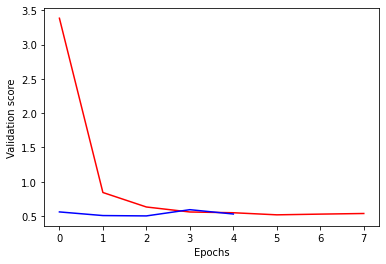

In [31]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

#### Exercise: Adding layers to a network

In [32]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model_1
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
model_1.add(Dense(2, activation='softmax'))

# Compile the model_1
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

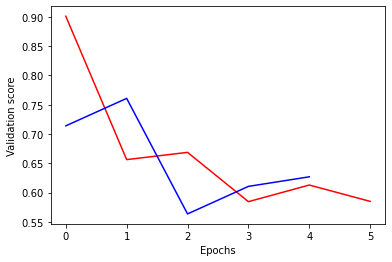

In [33]:
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

## Thinking about model capacity

- Overfitting

### Workflow for optimizing model capacity

- Start with a small network
- Gradually increase capacity
- Keep increasing capacity until validation score is no longer improving

## Stepping up to images

### Recognizing handwritten digits

- MNIST dataset
- 28 x 28 grid flattened to 784 values for each image
- Value in each part of array denotes darkness of that pixel

#### Exercise: Building your own digit recognition model

In [34]:
X = np.array(pd.read_csv("https://assets.datacamp.com/production/repositories/654/datasets/24769dae9dc51a77b9baa785d42ea42e3f8f7538/mnist.csv").iloc[:, 1:], dtype='float32')
y = to_categorical(pd.read_csv("https://assets.datacamp.com/production/repositories/654/datasets/24769dae9dc51a77b9baa785d42ea42e3f8f7538/mnist.csv").iloc[:, 0])

In [35]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)

44/44 [==============================] - 1s 6ms/step - loss: 27.8570 - accuracy: 0.3921 - val_loss: 9.3656 - val_accuracy: 0.4933


## Final thoughts

### Next steps

- Start with standard prediction problems on tables of numbers
- Images (with convolutional neural networks) are common next steps
- [keras.io](https://keras.io/) for excellent documentation
- Graphical processing unit (GPU) provides dramatic speedups in model training times
- Need a CUDA compatible GPU
- For training on using GPUs in the cloud look here:
    - https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws